In [19]:
from PredFunctions import *

In [20]:
# Данные за 3+ года
df0 = pd.read_csv(f"df_d0.csv", sep = ';', index_col = ['Date'], parse_dates = ['Date'])

df = pd.read_csv(f"df_d.csv", sep = ';', index_col = ['Date'], parse_dates = ['Date'])

df0

,Николаевка,Овиный,Песчанка,Телевизорная,Ветлужанка,Солонцы
Date,,,,,,
2019-01-01,282.68,214.41,116.39,32.78,275.44,NaN
2019-01-02,144.00,84.72,62.61,12.21,136.68,NaN
2019-01-03,29.88,9.18,28.29,44.03,9.64,NaN
2019-01-04,153.23,114.48,63.64,21.60,192.92,NaN
2019-01-05,137.52,118.21,96.16,2.50,134.26,NaN
...,...,...,...,...,...,...
2022-04-07,9.51,2.53,6.63,3.15,2.08,16.40
2022-04-08,19.71,6.64,21.89,18.39,12.80,39.96
2022-04-09,10.58,2.35,12.69,6.16,3.42,29.66


In [21]:
# Работаем с Николаевкой
district = 'Николаевка'

Nik0 = df0[district]
NikW0 = Nik0.copy()

Nik = df[district]
NikW = Nik.copy()

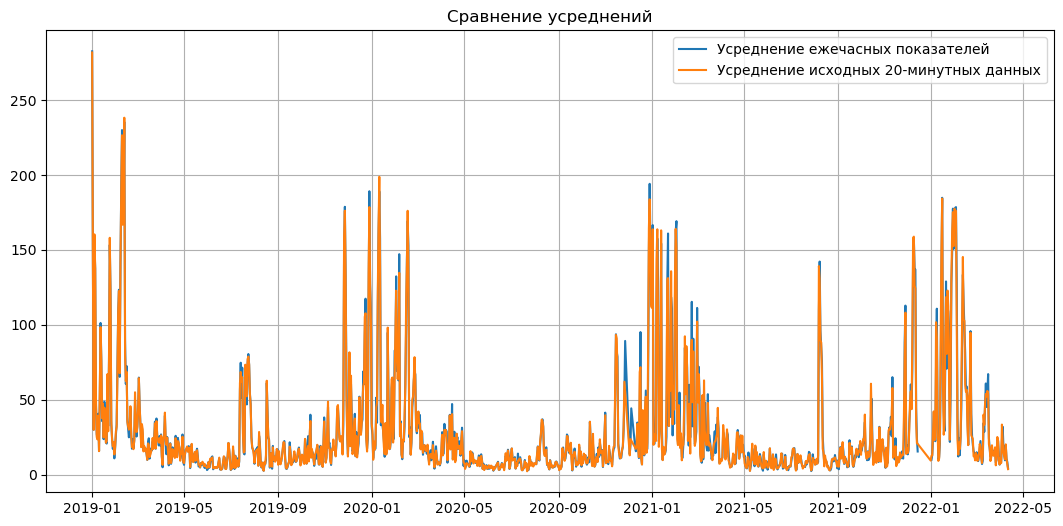

In [22]:
CompareGraph(Nik0, Nik, 'Усреднение ежечасных показателей', 'Усреднение исходных 20-минутных данных', 'Сравнение усреднений')

### Зима 2019-2020 год

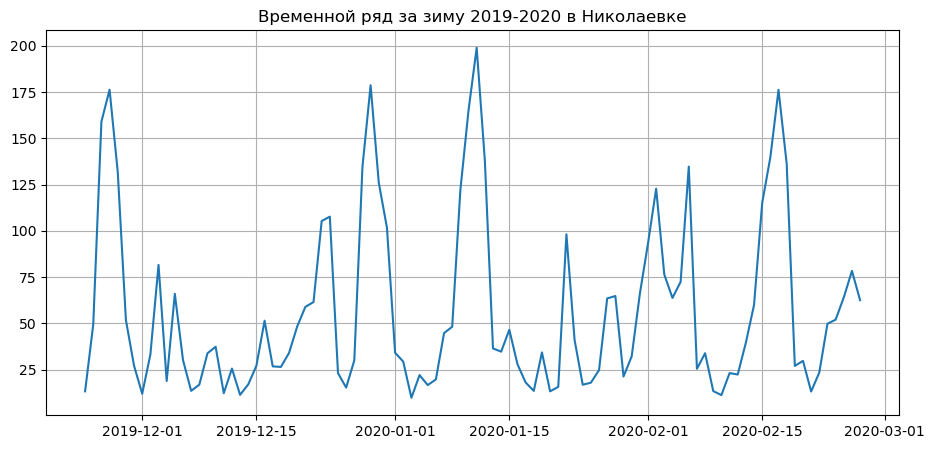

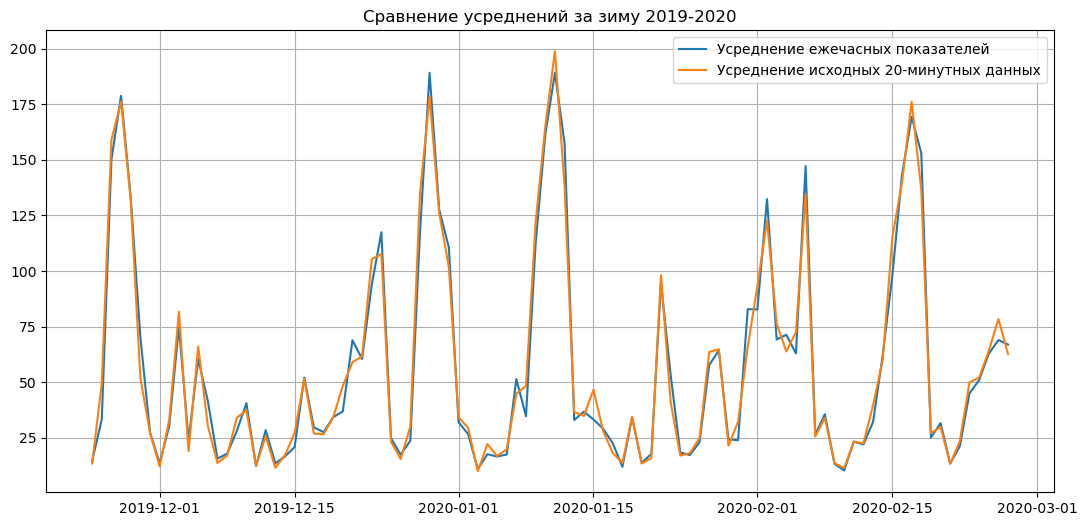

In [23]:
# Срез зимы 2019-2020 год
a, b = "2019-11-24", "2020-02-27"
c = "2020-02-21"
PlotSerie(Nik[a:b], 'Временной ряд за зиму 2019-2020 в Николаевке')

CompareGraph(Nik0[a:b], Nik[a:b], 'Усреднение ежечасных показателей', 'Усреднение исходных 20-минутных данных', 'Сравнение усреднений за зиму 2019-2020')

In [24]:
NikW = NikW[a : c]

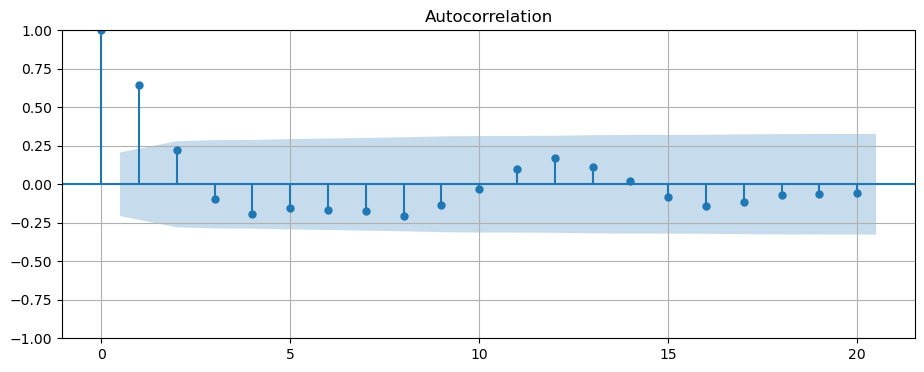

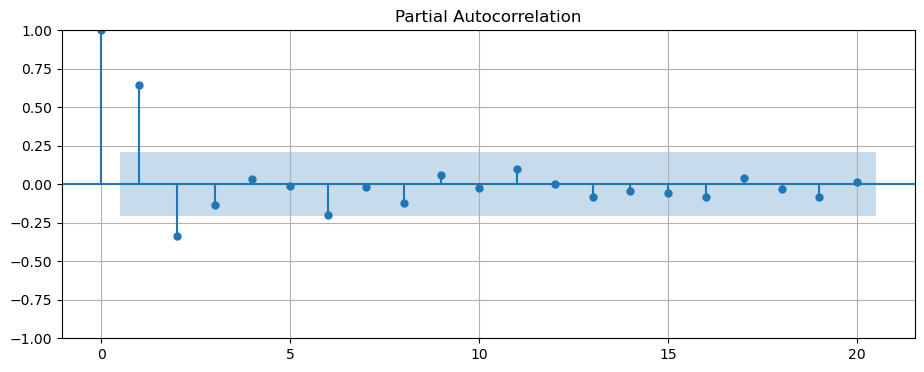

In [25]:
plotCF(NikW)

### Построение модели за декабрь 2019 года

In [26]:
# Оптимальные параметры p, d, q
optParam = optimize_SARIMA(NikW, p = 4 , d = 0, q = 2)
d = optParam[1]
optParam

  0%|          | 0/15 [00:00<?, ?it/s]

(4, 0, 1)

,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,1.8289,0.075,24.427,0.000,1.682,1.976
ar.L2,-1.0281,0.229,-4.483,0.000,-1.478,-0.579
ar.L3,0.0414,0.286,0.145,0.885,-0.518,0.601
ar.L4,0.1578,0.145,1.090,0.276,-0.126,0.442
ma.L1,-0.9982,0.144,-6.919,0.000,-1.281,-0.715
sigma2,1174.4554,0.000,8.91e+06,0.000,1174.455,1174.456


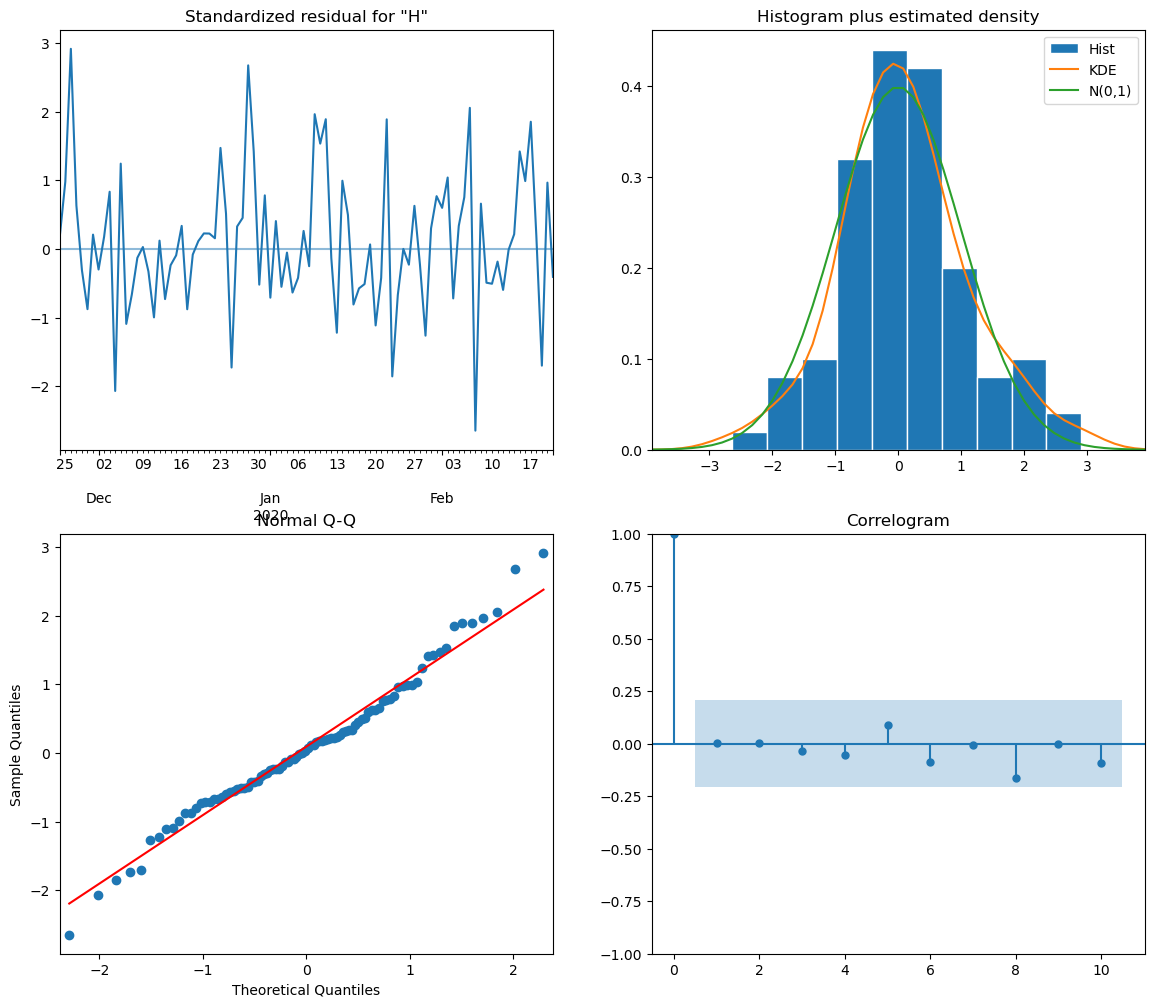

In [27]:
Wmodel = getModel(NikW, optParam, s = 0)

### Оценка качества модели

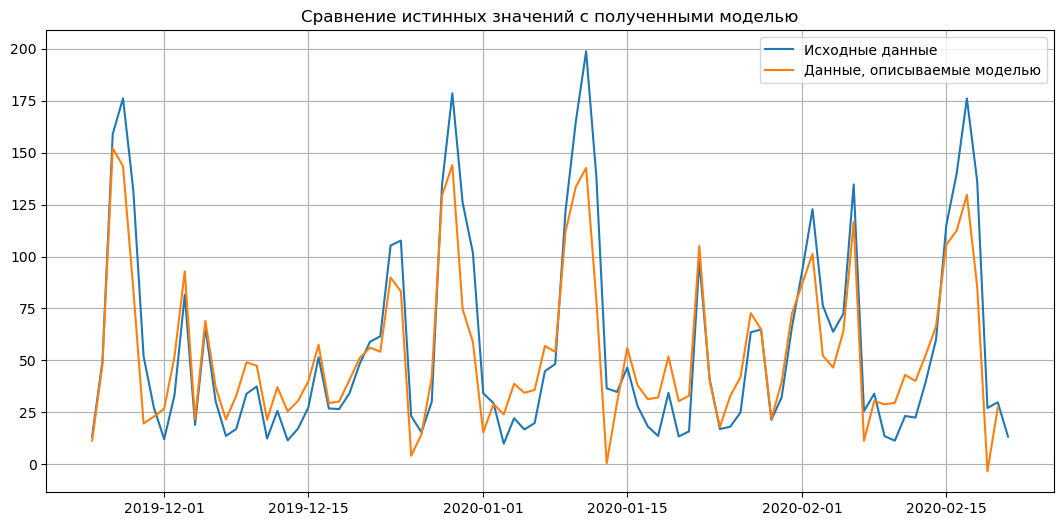

MAE: 15.389616456463798
R2: 0.8246749267769402


In [28]:
CompareModel(NikW, Wmodel, d)

### Прогнозирование на неделю вперёд

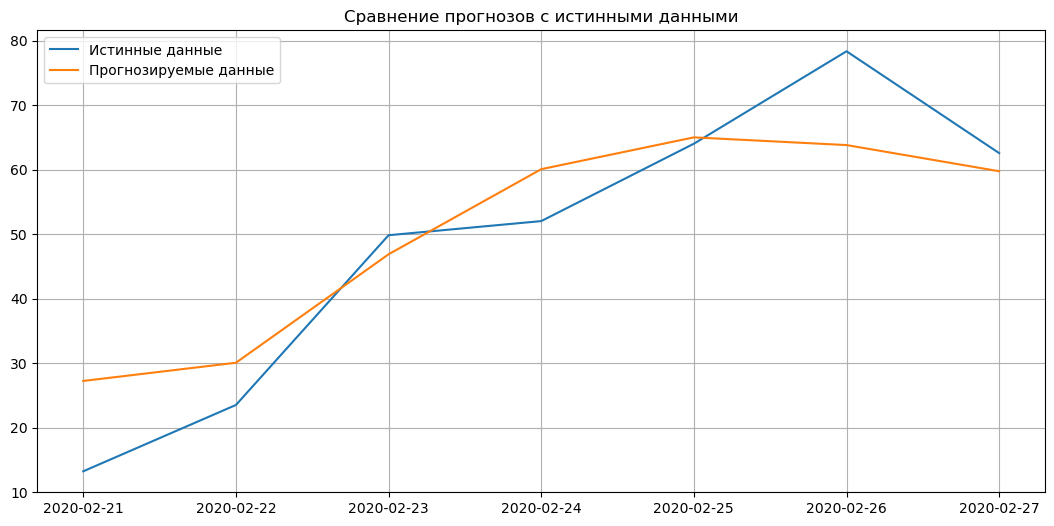

MAE: 7.127464146128991
R2: 0.833981482029934


In [29]:
startDate = c
endDate = b

predictions = GetPred(Wmodel, startDate, endDate)

ComparePred(Nik[startDate: endDate], predictions)